# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/customer-booking/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0


In [9]:
df_features = df.drop(['booking_complete'], axis=1)

In [10]:
df_features

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62


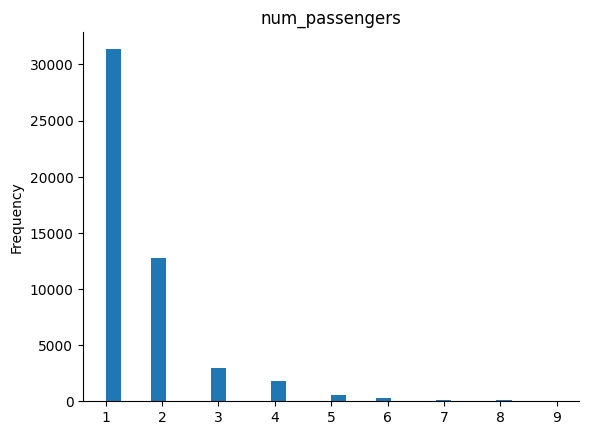

In [11]:
# @title num_passengers

from matplotlib import pyplot as plt
df_features['num_passengers'].plot(kind='hist', bins=30, title='num_passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [13]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [14]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [32]:
df_features = df_features.drop(['route'], axis=1)

In [33]:
df_features

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,Australia,1,0,1,5.62
49996,1,Internet,RoundTrip,111,6,4,7,Australia,0,0,0,5.62
49997,1,Internet,RoundTrip,24,6,22,6,Australia,0,0,1,5.62
49998,1,Internet,RoundTrip,15,6,11,1,Australia,1,0,1,5.62


In [16]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [17]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [35]:
df_preproc = pd.get_dummies(df_features, columns=['sales_channel', 'trip_type', 'booking_origin'])

In [36]:
df_preproc

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,True,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,6,0,0,0,5.52,True,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,3,1,1,0,5.52,True,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,6,0,0,1,5.52,True,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,3,1,0,1,5.52,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,True,...,False,False,False,False,False,False,False,False,False,False
49996,1,111,6,4,7,0,0,0,5.62,True,...,False,False,False,False,False,False,False,False,False,False
49997,1,24,6,22,6,0,0,1,5.62,True,...,False,False,False,False,False,False,False,False,False,False
49998,1,15,6,11,1,1,0,1,5.62,True,...,False,False,False,False,False,False,False,False,False,False


In [38]:
#preparing dataset for ML

X = df_preproc
y = df['booking_complete']

In [49]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [50]:
transform = preprocessing.StandardScaler()
X_norm = transform.fit_transform(X)

In [51]:
X_norm

array([[ 0.40068439,  1.95753005, -0.11935316, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [-0.57955926,  0.29916394, -0.08984361, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [ 0.40068439,  1.74747034, -0.0308245 , ..., -0.09593717,
        -0.00447218, -0.08843466],
       ...,
       [-0.57955926, -0.67374418, -0.50297735, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [-0.57955926, -0.77324614, -0.50297735, ..., -0.09593717,
        -0.00447218, -0.08843466],
       [-0.57955926, -0.72902305, -0.50297735, ..., -0.09593717,
        -0.00447218, -0.08843466]])

Accuracy: 0.8506
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8510
           1       0.49      0.11      0.18      1490

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



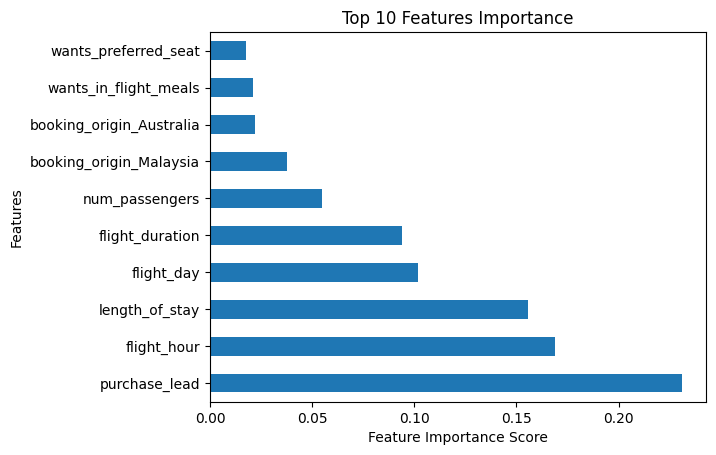

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=10)


# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generating classification report
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


In [101]:
y_pred.shape

(10000,)

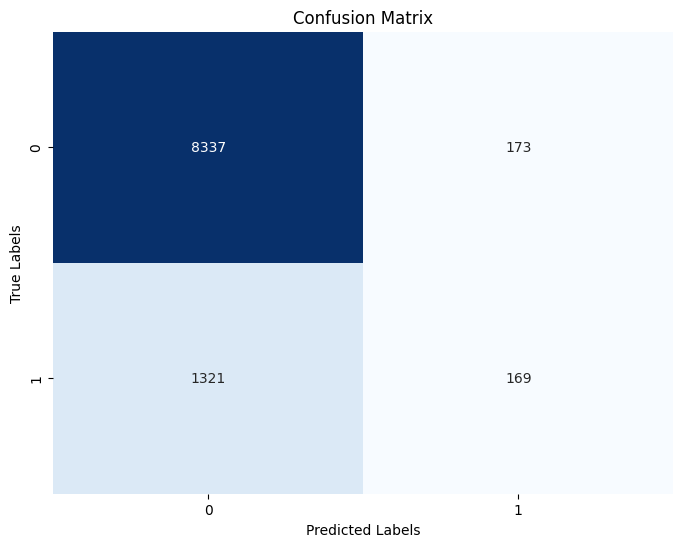

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains your features and y contains your target variable

# Initialize your classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100)

# Perform cross-validation
scores = cross_val_score(clf, X_norm, y, cv=5)  # cv=5 indicates 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean score and standard deviation
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Cross-validation scores: [0.8499 0.8314 0.8017 0.4347 0.7436]
Mean Accuracy: 0.73 (+/- 0.31)


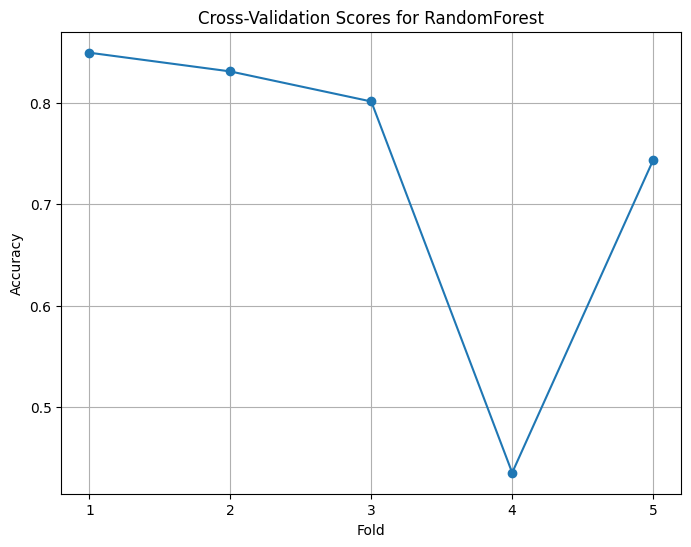

In [86]:
# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores for RandomForest')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)
plt.show()

**Logistic Regression**

In [72]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [73]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
lr_cv = GridSearchCV(lr, parameters, cv=10)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [74]:
print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8505499999999999


In [75]:
# Calculate the accuracy on the test data
accuracy = lr_cv.score(X_test, y_test)

print("Accuracy on the test data:", accuracy)

Accuracy on the test data: 0.8498


In [76]:
yhat=lr_cv.predict(X_test)


In [100]:
yhat.shape

(10000,)

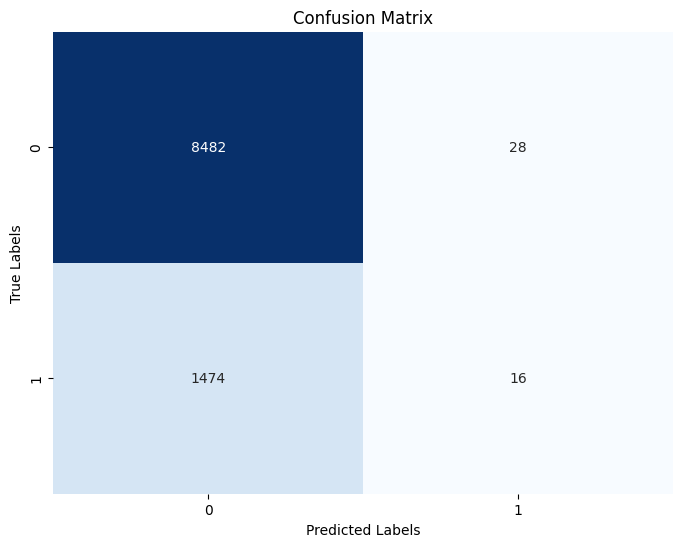

In [77]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, yhat)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [82]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8510
           1       0.36      0.01      0.02      1490

    accuracy                           0.85     10000
   macro avg       0.61      0.50      0.47     10000
weighted avg       0.78      0.85      0.78     10000



In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming X contains your features and y contains your target variable

# Initialize logistic regression classifier
logreg = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5)  # cv=5 indicates 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean score and standard deviation
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.8504 0.8508 0.8502 0.8476 0.8456]
Mean Accuracy: 0.85 (+/- 0.00)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


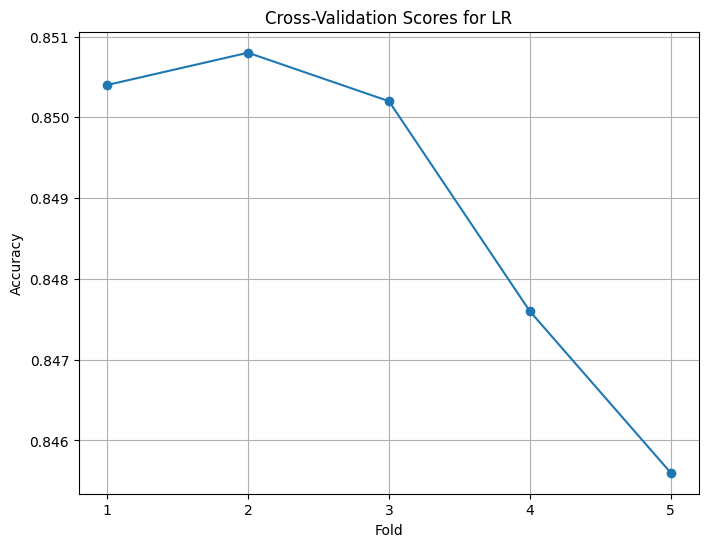

In [85]:
# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores for LR')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(True)
plt.show()

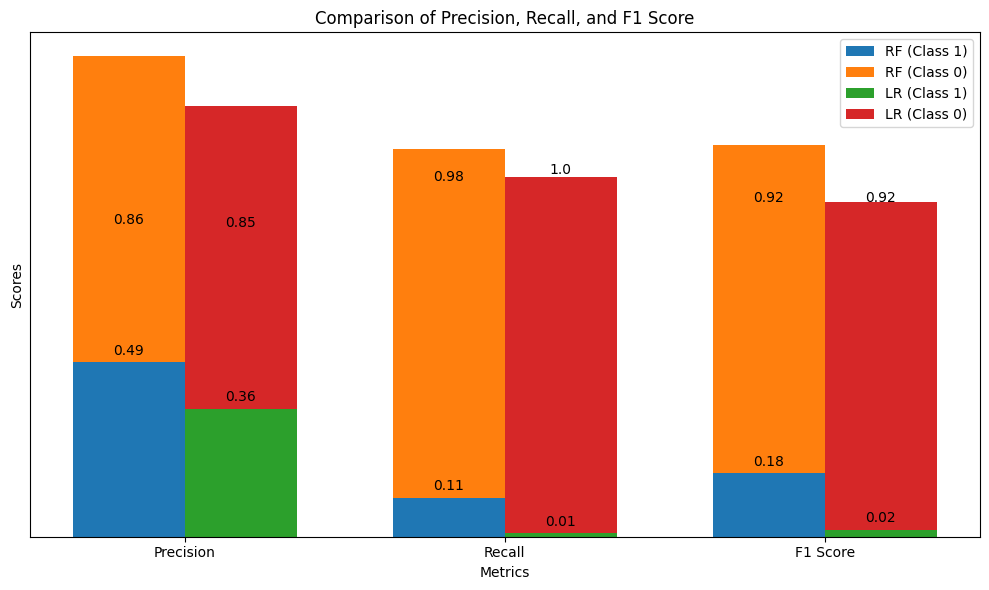

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have precision, recall, and F1 scores for both models
# Replace `rf_precision_1`, `rf_recall_1`, `rf_f1_1` with precision, recall, and F1 score for class 1 for Random Forest
# Replace `lr_precision_1`, `lr_recall_1`, `lr_f1_1` with precision, recall, and F1 score for class 1 for Logistic Regression
# Replace `rf_precision_0`, `rf_recall_0`, `rf_f1_0` with precision, recall, and F1 score for class 0 for Random Forest
# Replace `lr_precision_0`, `lr_recall_0`, `lr_f1_0` with precision, recall, and F1 score for class 0 for Logistic Regression

# Data
labels = ['Precision', 'Recall', 'F1 Score']
rf_scores_1 = [0.49, 0.11, 0.18]
rf_scores_0 = [0.86, 0.98, 0.92]
lr_scores_1 = [0.36, 0.01, 0.02]
lr_scores_0 = [0.85, 1.00, 0.92]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rf_scores_1, width, label='RF (Class 1)')
rects2 = ax.bar(x - width/2, rf_scores_0, width, label='RF (Class 0)', bottom=rf_scores_1)
rects3 = ax.bar(x + width/2, lr_scores_1, width, label='LR (Class 1)')
rects4 = ax.bar(x + width/2, lr_scores_0, width, label='LR (Class 0)', bottom=lr_scores_1)

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.yaxis.set_ticks([])
# Adding annotations
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Display the plot
plt.tight_layout()
plt.savefig('comparison_plot.png', dpi=300)
plt.show()
